In [ ]:
# Log Analysis & Intrusion Detection

**Author:** Nonkanyiso(Leiggh-Anne) Ndimande
**Project Type:** Cybersecurity Portfolio Project
**Tools Used:** Python, Pandas, Matplotlib, Seaborn, Google Colab
**Dataset:** `authentication_logs.csv`

---

## Project Overview
This project analyzes authentication logs to detect suspicious activity, such as repeated failed logins or abnormal login patterns.
It demonstrates practical cybersecurity analysis skills, Python programming, and clear, portfolio-ready reporting.


In [1]:
# 1.
# --------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set_style("whitegrid")
%matplotlib inline

print("Libraries imported successfully.")


Libraries imported successfully.


In [4]:
#2.
# -----------------------------

from google.colab import files
upload = files.upload()

df = pd.read_csv('authentication_logs.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

print("Dataset loaded successfully.")
df.head()

Saving authentication_logs.csv to authentication_logs (1).csv
Dataset loaded successfully.


,timestamp,username,ip_address,status,location
0,2026-01-17 15:01:25.614068,user17,103.26.99.93,Success,UK
1,2025-12-24 14:12:25.614068,user44,142.147.37.99,Failed,UK
2,2025-12-20 15:55:25.614068,user49,130.230.143.212,Success,AU
3,2026-01-01 01:00:25.614068,user47,254.60.65.250,Failed,US
4,2025-12-30 16:05:25.614068,user50,25.201.191.204,Success,CA


In [5]:
# 3. DATASET OVERVIEW
# --------------------------
print("Dataset Shape:", df.shape)
print("\nData Info:")
df.info()

print("\nMissing Values per Column:")
print(df.isna().sum())

print("\nBasic Status Counts:")
print(df['status'].value_counts())

Dataset Shape: (1200, 5)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   1200 non-null   datetime64[ns]
 1   username    1200 non-null   object        
 2   ip_address  1200 non-null   object        
 3   status      1200 non-null   object        
 4   location    1200 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 47.0+ KB

Missing Values per Column:
timestamp     0
username      0
ip_address    0
status        0
location      0
dtype: int64

Basic Status Counts:
status
Success    943
Failed     257
Name: count, dtype: int64


/tmp/ipython-input-2435685603.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_failed_users.index, y=top_failed_users.values, palette='Reds')


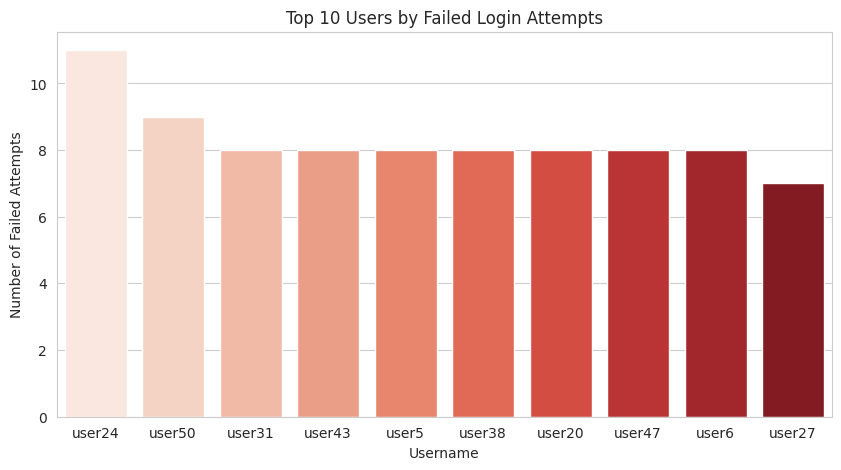

In [6]:
# 4. TOP FAILED LOGIN ATTEMPTS
# --------------------------

failed_logins = df[df['status'] == 'Failed']
top_failed_users = failed_logins['username'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_failed_users.index, y=top_failed_users.values, palette='Reds')
plt.title("Top 10 Users by Failed Login Attempts")
plt.xlabel("Username")
plt.ylabel("Number of Failed Attempts")
plt.show()

/tmp/ipython-input-1973852836.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_failed_ips.index, y=top_failed_ips.values, palette='Oranges')


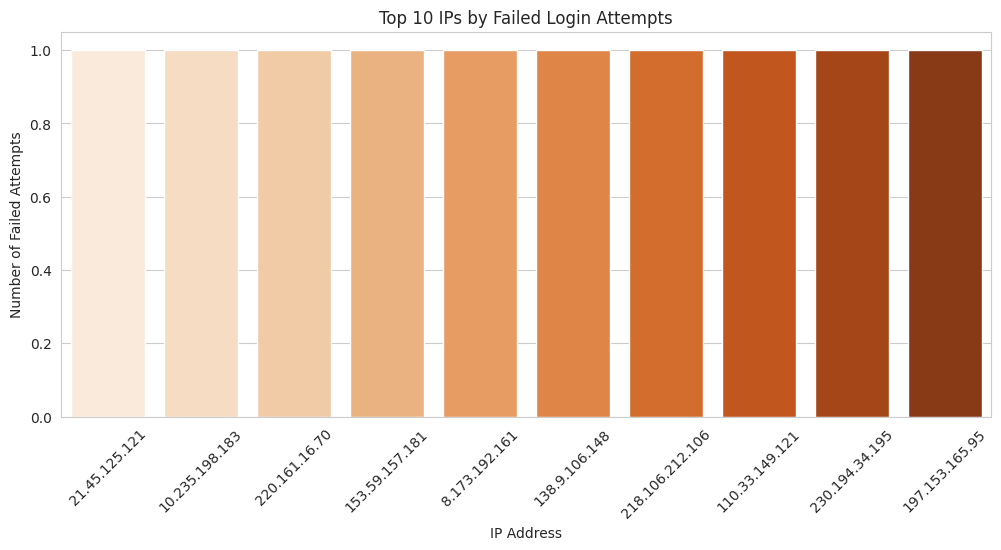

In [7]:
# 5. FAILED LOGINS BY IP
# --------------------------

top_failed_ips = failed_logins['ip_address'].value_counts().head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=top_failed_ips.index, y=top_failed_ips.values, palette='Oranges')
plt.title("Top 10 IPs by Failed Login Attempts")
plt.xlabel("IP Address")
plt.ylabel("Number of Failed Attempts")
plt.xticks(rotation=45)
plt.show()

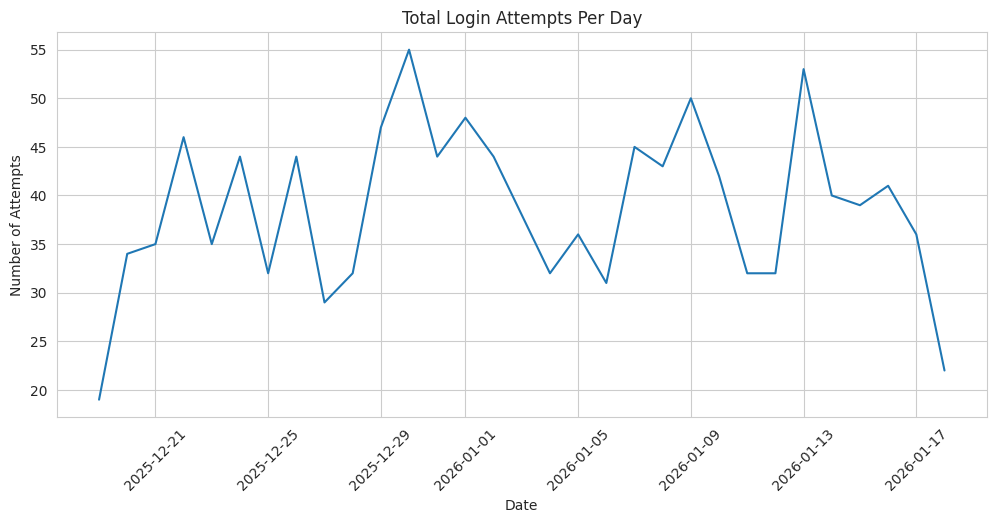

In [8]:
# 6. LOGIN ACTIVITY OVER TIME
# --------------------------

plt.figure(figsize=(12,5))
df.groupby(df['timestamp'].dt.date)['status'].count().plot()
plt.title("Total Login Attempts Per Day")
plt.xlabel("Date")
plt.ylabel("Number of Attempts")
plt.xticks(rotation=45)
plt.show()

In [9]:
# 7. ANOMALY DETECTION
# --------------------------

failed_counts = failed_logins['username'].value_counts()

threshold = failed_counts.mean() + 2*failed_counts.std()
suspicious_users = failed_counts[failed_counts > threshold]

print("Suspicious Users with High Failed Logins:")
print(suspicious_users)

Suspicious Users with High Failed Logins:
username
user24    11
Name: count, dtype: int64


In [10]:
# 8. SAVE CLEANED DATA
# --------------------------
df.to_csv('authentication_logs_cleaned.csv', index=False)
from google.colab import files
files.download('authentication_logs_cleaned.csv')

print("Cleaned dataset saved and ready for download ")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cleaned dataset saved and ready for download 
